In [41]:
# Input data

import scipy.io as spio
import numpy as np

# Reading the data for the Face from all the subjects
BahramFace = spio.loadmat(file_name='../data/bci-project-data-RAW/BahramFace.mat')
DJFace = spio.loadmat(file_name='../data/bci-project-data-RAW/DJFace.mat')
NickFace = spio.loadmat(file_name='../data/bci-project-data-RAW/NickFace.mat')
RoohiFace = spio.loadmat(file_name='../data/bci-project-data-RAW/RoohiFace.mat')
SarahFace = spio.loadmat(file_name='../data/bci-project-data-RAW/SarahFace.mat')

# Deviding the input data into train and validation
# For creating the training and testing set, 30% percent of each subject is considered as test and
# 70% of each subject is conidered as training.
length = int(BahramFace['Intensification_Data'].shape[0] * 0.30)
# length

FacesDataAll = np.vstack(tup=(BahramFace['Intensification_Data'][:], 
                       DJFace['Intensification_Data'][:], 
                       NickFace['Intensification_Data'][:],
                      RoohiFace['Intensification_Data'][:],
                      SarahFace['Intensification_Data'][:]))

FacesDataTrainAll = np.vstack(tup=(BahramFace['Intensification_Data'][:-length], 
                       DJFace['Intensification_Data'][:-length], 
                       NickFace['Intensification_Data'][:-length],
                      RoohiFace['Intensification_Data'][:-length],
                      SarahFace['Intensification_Data'][:-length]))

FacesDataTest = np.vstack(tup=(BahramFace['Intensification_Data'][-length:], 
                       DJFace['Intensification_Data'][-length:], 
                       NickFace['Intensification_Data'][-length:],
                      RoohiFace['Intensification_Data'][-length:],
                      SarahFace['Intensification_Data'][-length:]))

print(FacesDataAll.shape, FacesDataAll.dtype, 
 FacesDataTest.shape, FacesDataTest.dtype, 
 FacesDataTrainAll.shape, FacesDataTrainAll.dtype)

BahramFaceDataTrain = BahramFace['Intensification_Data'][:-length]
DJFaceDataTrain = DJFace['Intensification_Data'][:-length]
NickFaceDataTrain = NickFace['Intensification_Data'][:-length]
RoohiFaceDataTrain = RoohiFace['Intensification_Data'][:-length]
SarahFaceDataTrain = SarahFace['Intensification_Data'][:-length]

# 30% of the total training data is validation,
# 70% of the total training data is training
# This is applied to every single subject data.
length2 = int(BahramFaceDataTrain.shape[0] * 0.30)
# length2

FacesDataTrain = np.vstack(tup=(BahramFaceDataTrain[:-length2], 
                       DJFaceDataTrain[:-length2], 
                       NickFaceDataTrain[:-length2],
                      RoohiFaceDataTrain[:-length2],
                      SarahFaceDataTrain[:-length2]))

FacesDataValid = np.vstack(tup=(BahramFaceDataTrain[-length2:], 
                       DJFaceDataTrain[-length2:], 
                       NickFaceDataTrain[-length2:],
                      RoohiFaceDataTrain[-length2:],
                      SarahFaceDataTrain[-length2:]))

print(FacesDataTrainAll.shape, FacesDataTrainAll.dtype, 
 FacesDataTrain.shape, FacesDataTrain.dtype, 
 FacesDataValid.shape, FacesDataValid.dtype)

FacesLabelAll = np.vstack(tup=(BahramFace['Intensification_Label'][:], 
                       DJFace['Intensification_Label'][:], 
                       NickFace['Intensification_Label'][:],
                      RoohiFace['Intensification_Label'][:],
                      SarahFace['Intensification_Label'][:]))

FacesLabelTrainAll = np.vstack(tup=(BahramFace['Intensification_Label'][:-length], 
                       DJFace['Intensification_Label'][:-length], 
                       NickFace['Intensification_Label'][:-length],
                      RoohiFace['Intensification_Label'][:-length],
                      SarahFace['Intensification_Label'][:-length]))

FacesLabelTest = np.vstack(tup=(BahramFace['Intensification_Label'][-length:], 
                       DJFace['Intensification_Label'][-length:], 
                       NickFace['Intensification_Label'][-length:],
                      RoohiFace['Intensification_Label'][-length:],
                      SarahFace['Intensification_Label'][-length:]))

print(FacesLabelAll.shape, FacesLabelAll.dtype,
 FacesLabelTest.shape, FacesLabelTest.dtype, 
 FacesLabelTrainAll.shape, FacesLabelTrainAll.dtype)

BahramFaceLabelTrain = BahramFace['Intensification_Label'][:-length]
DJFaceLabelTrain = DJFace['Intensification_Label'][:-length]
NickFaceLabelTrain = NickFace['Intensification_Label'][:-length]
RoohiFaceLabelTrain = RoohiFace['Intensification_Label'][:-length]
SarahFaceLabelTrain = SarahFace['Intensification_Label'][:-length]

FacesLabelTrain = np.vstack(tup=(BahramFaceLabelTrain[:-length2], 
                       DJFaceLabelTrain[:-length2], 
                       NickFaceLabelTrain[:-length2],
                      RoohiFaceLabelTrain[:-length2],
                      SarahFaceLabelTrain[:-length2]))

FacesLabelValid = np.vstack(tup=(BahramFaceLabelTrain[-length2:], 
                       DJFaceLabelTrain[-length2:], 
                       NickFaceLabelTrain[-length2:],
                      RoohiFaceLabelTrain[-length2:],
                      SarahFaceLabelTrain[-length2:]))

# # Normalizing input data
# def normalize(inputs, inputs_all):
#     return (inputs - inputs_all.mean(axis=0)[None,:,:]) / inputs_all.std(axis=0)[None,:,:]
# Yalda suggested this normalization.
def normalize(inputs):
    return (inputs - inputs.mean(axis=0)[None,:,:]) / inputs.std(axis=0)[None,:,:]

# onehot vectorizing output labels
def one_hot(labels, n_class):
    """ One-hot encoding """
    expansion = np.eye(n_class)
    y = expansion[:, labels-1].T
    assert y.shape[1] == n_class, "Wrong number of labels!"

    return y

# get minibatches for learning
def get_batches(X, y, batch_size):
    """ Return a generator for batches """
    n_batches = len(X) // batch_size
    X, y = X[:n_batches*batch_size], y[:n_batches*batch_size]

    # Loop over batches and yield
    for b in range(0, len(X), batch_size):
        yield X[b:b+batch_size], y[b:b+batch_size]

# Standardize/normalize train and test
# X_train_norm_all = normalize(inputs=FacesDataTrain, inputs_all=FacesDataAll)
X_train_norm = normalize(inputs=FacesDataTrain)
X_valid_norm = normalize(inputs=FacesDataValid)
X_test_norm = normalize(inputs=FacesDataTest)

print(X_train_norm.shape, X_train_norm.dtype, 
X_valid_norm.shape, X_valid_norm.dtype,
X_test_norm.shape, X_test_norm.dtype)

### Hyperparameters

# Input data
batch_size = X_train_norm.shape[0]// 100 # minibatch size & number of minibatches
seq_len = X_train_norm.shape[1] # Number of steps: each trial length
n_channels = X_train_norm.shape[2] # number of channels in each trial

# Output labels
n_classes = int(FacesLabelAll.max() + 1)

# Tweekable parameters
learning_rate = 0.001 #1e-3
epochs = 10 # num iterations for updating model
keep_prob = 0.50 # 90% neurons are kept and 10% are dropped out

Y_train = np.array(FacesLabelTrain, dtype=int).reshape(-1)
Y_valid = np.array(FacesLabelValid, dtype=int).reshape(-1)
Y_test = np.array(FacesLabelTest, dtype=int).reshape(-1)

Y_train_onehot = one_hot(labels=Y_train, n_class=n_classes)
Y_valid_onehot = one_hot(labels=Y_valid, n_class=n_classes)
Y_test_onehot = one_hot(labels=Y_test, n_class=n_classes)

print(Y_train_onehot.shape, Y_valid_onehot.shape, Y_test_onehot.shape, 
 X_train_norm.shape, X_valid_norm.shape, X_test_norm.shape)

print(Y_train_onehot.dtype, Y_valid_onehot.dtype, Y_test_onehot.dtype,
 X_train_norm.dtype, X_valid_norm.dtype, X_test_norm.dtype)

# GPUs or CPU

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

#  No graphs is needed on tensorflow
inputs_ = tf.placeholder(tf.float32, [None, seq_len, n_channels], name = 'inputs_')
labels_ = tf.placeholder(tf.float32, [None, n_classes], name = 'labels_')
keep_prob_ = tf.placeholder(tf.float32, name = 'keep_prob_')
learning_rate_ = tf.placeholder(tf.float32, name = 'learning_rate_')# Construct the LSTM inputs and LSTM cells

(18720, 205, 16) float64 (5400, 205, 16) float64 (13320, 205, 16) float64
(13320, 205, 16) float64 (9540, 205, 16) float64 (3780, 205, 16) float64
(18720, 1) uint8 (5400, 1) uint8 (13320, 1) uint8
(9540, 205, 16) float64 (3780, 205, 16) float64 (5400, 205, 16) float64
(9540, 2) (3780, 2) (5400, 2) (9540, 205, 16) (3780, 205, 16) (5400, 205, 16)
float64 float64 float64 float64 float64 float64
TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


In [42]:
# Forward pass: Convolutional Layers, FC Layer, and Output layer
# (batch, 205, 16) --> (batch, 101, 32)
# (205 - 5 + 0)/2 + 1 = 100+1= 101
# 2/5 with strides/kernel_size is 40% non-overlap/diff region and 60% overlapping window/ common region
in_conv = inputs_
out_conv = tf.layers.conv1d(inputs=in_conv, filters=32, kernel_size=5, strides=2, padding='valid')
out_conv = tf.layers.batch_normalization(inputs=out_conv)
out_conv = tf.nn.relu(features=out_conv)
out_conv = tf.nn.dropout(x=out_conv, keep_prob=keep_prob_)
print(out_conv.shape)

# (batch, 101, 32) --> (batch, 49, 64)
# (101 - 5 + 0)/2 + 1 = (96/2)+1= 48+1= 49
# 2/5 with strides/kernel_size is 40% non-overlap/diff region and 60% overlapping window/ common region
in_conv = out_conv
out_conv = tf.layers.conv1d(inputs=in_conv, filters=64, kernel_size=5, strides=2, padding='valid')
out_conv = tf.layers.batch_normalization(inputs=out_conv)
out_conv = tf.nn.relu(features=out_conv)
out_conv = tf.nn.dropout(x=out_conv, keep_prob=keep_prob_)
print(out_conv.shape)

# (batch, 49, 64) --> (batch, 49*64) --> (batch, 49*64*2)
# 49*64 = 50*64 - 1*64 = 3200 - 64 = 3136, 3136*2 = 6272
# (batch, 49, 64) --> (batch, 3200) --> (batch, 6272)
in_fc = tf.reshape(tensor=out_conv, shape=(-1, 49*64))
out_fc = tf.layers.dense(inputs=in_fc, units=49*64*2)
out_fc = tf.layers.batch_normalization(inputs=out_fc)
out_fc = tf.nn.relu(features=out_fc)
out_fc = tf.nn.dropout(x=out_fc, keep_prob=keep_prob_)
print(in_fc.shape, out_fc.shape)

# (batch, 49*64*2) --> (batch, 2) 
logits = tf.layers.dense(inputs=out_fc, units=n_classes)
print(logits.shape)

(?, 101, 32)
(?, 49, 64)
(?, 3136) (?, 6272)
(?, 2)


In [43]:
# Backward pass: error backpropagation
# Cost function
cost_tensor = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_)
cost = tf.reduce_mean(input_tensor=cost_tensor)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
print(accuracy)

Tensor("accuracy_2:0", shape=(), dtype=float32)


In [44]:
class_label_pos = tf.argmax(labels_, 1)
class_label_neg = tf.argmin(labels_, 1)
pred_label_pos = tf.argmax(logits, 1)
pred_label_neg = tf.argmin(logits, 1)

In [53]:
# TruePos = tf.equal(name='TruePos', x=class_label_pos, y=pred_label_pos)
# TruePosMean = tf.reduce_mean(tf.cast(TruePos, tf.float32), name='TruePosMean')

# TrueNeg = tf.equal(name='TrueNeg', x=class_label_neg, y=pred_label_neg)
# TrueNegMean = tf.reduce_mean(tf.cast(TrueNeg, tf.float32), name='TrueNegMean')

# FalseNeg = tf.not_equal(name='FalseNeg', x=class_label_pos, y=pred_label_neg)
# FalseNegMean = tf.reduce_mean(tf.cast(FalseNeg, tf.float32), name='FalseNegMean')

# FalsePos = tf.not_equal(name='FalsePos', x=class_label_neg, y=pred_label_pos)
# FalsePosMean = tf.reduce_mean(tf.cast(FalsePos, tf.float32), name='FalsePosMean')

In [55]:
# print(TruePos.shape, TrueNeg.shape, FalseNeg.shape, FalsePos.shape)

In [56]:
# print(TruePosMean.shape, TrueNegMean.shape, FalseNegMean.shape, FalsePosMean.shape)

In [57]:
NotTruePos = tf.not_equal(name='NotTruePos', x=class_label_pos, y=pred_label_pos)
NotTruePosMean = tf.reduce_mean(tf.cast(NotTruePos, tf.float32), name='NotTruePosMean')

In [58]:
# When the prediction is not correct: 
FalsePosMean = (1/n_classes) * NotTruePosMean # false prediction
TrueNegMean = ((n_classes - 2)/ n_classes) * NotTruePosMean 
FalseNegMean = (1/n_classes) * NotTruePosMean

In [60]:
# sensitivity == tp/ (tp+fn)
sensitivity = TruePosMean/ (TruePosMean+FalseNegMean)
print(sensitivity)

# # specificity == fp/ (fp+tn)
specificity = FalsePosMean/(FalsePosMean+TrueNegMean)
print(specificity)

# acc == (tp+tn)/ (tp+tn+fp+fn)
accuracy2 = (TrueNegMean+TruePosMean)/ (TrueNegMean+TruePosMean+FalseNegMean+FalsePosMean)
print(accuracy2)

# # loss == (fn+fp)/ (fp+fn+tp+tn)
cost2 = (FalseNegMean+FalsePosMean)/ (TrueNegMean+TruePosMean+FalseNegMean+FalsePosMean)
print(cost2)

Tensor("truediv_24:0", shape=(), dtype=float32)
Tensor("truediv_25:0", shape=(), dtype=float32)
Tensor("truediv_26:0", shape=(), dtype=float32)
Tensor("truediv_27:0", shape=(), dtype=float32)


In [61]:
with tf.Session() as sess:
    # initalize session global variables just in the case they are initialized.
    sess.run(tf.global_variables_initializer())
    
    for e in range(epochs):
       
        # Loop over batches
        for x, y in get_batches(X_train_norm, Y_train_onehot, batch_size):
            
            # Feed dictionary
            feed = {inputs_:x, labels_:y, keep_prob_: keep_prob, learning_rate_:learning_rate}
            _, loss, acc, tpm, tnm, fnm, fpm, ntpm, sens, spec, acc2, loss2 = sess.run(
                [optimizer, cost, accuracy, TruePosMean, TrueNegMean, FalseNegMean, FalsePosMean, 
                 NotTruePosMean, sensitivity, specificity, accuracy2, cost2],
                feed_dict = feed)

        print(loss, acc, tpm, tnm, fnm, fpm, ntpm, sens, spec, acc2, loss2)

0.363392 0.831579 0.831579 0.0 0.0842105 0.0842105 0.168421 0.908046 1.0 0.831579 0.168421
0.215802 0.915789 0.915789 0.0 0.0421053 0.0421053 0.0842105 0.956044 1.0 0.915789 0.0842105
0.214497 0.905263 0.905263 0.0 0.0473684 0.0473684 0.0947369 0.950276 1.0 0.905263 0.0947369
0.176864 0.947369 0.947369 0.0 0.0263158 0.0263158 0.0526316 0.972973 1.0 0.947368 0.0526316
0.154932 0.926316 0.926316 0.0 0.0368421 0.0368421 0.0736842 0.961749 1.0 0.926316 0.0736842
0.176091 0.936842 0.936842 0.0 0.031579 0.031579 0.0631579 0.967391 1.0 0.936842 0.0631579
0.168401 0.926316 0.926316 0.0 0.0368421 0.0368421 0.0736842 0.961749 1.0 0.926316 0.0736842
0.147064 0.968421 0.968421 0.0 0.0157895 0.0157895 0.031579 0.983957 1.0 0.968421 0.031579
0.204353 0.926316 0.926316 0.0 0.0368421 0.0368421 0.0736842 0.961749 1.0 0.926316 0.0736842
0.164748 0.947369 0.947369 0.0 0.0263158 0.0263158 0.0526316 0.972973 1.0 0.947368 0.0526316


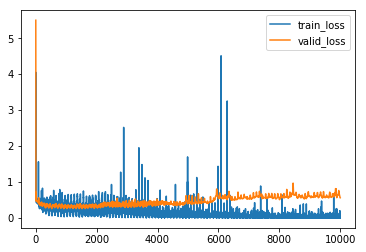

In [5]:
import matplotlib.pyplot as mplot

mplot.plot(train_loss, label='train_loss')
mplot.plot(valid_loss, label='valid_loss')
mplot.legend()
mplot.show()

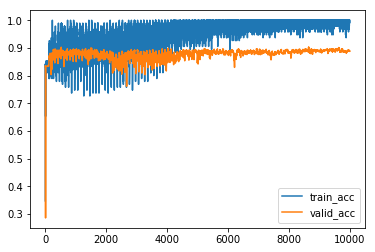

In [6]:
# import matplotlib.pyplot as mplot

mplot.plot(train_acc, label='train_acc')
mplot.plot(valid_acc, label='valid_acc')
mplot.legend()
mplot.show()